In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

from skimage.filters import threshold_triangle
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import os
import statsmodels.api as sm
import cv2
import matplotlib.patches as mpatches
import psutil
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import Normalize


%matplotlib inline
plt.rcParams.update({'font.size': 20})

from sklearn.feature_extraction.image import grid_to_graph
from mpl_toolkits.axes_grid1 import ImageGrid
import json
from matplotlib.ticker import FuncFormatter

import nibabel as nib

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import itertools
import random
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm

from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression

import pickle
from sklearn.decomposition import PCA

In [2]:
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/labels.pickle'
with open(labels_file, 'rb') as handle:
    cluster_model_labels = pickle.load(handle)

In [3]:
file = F'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/20210214_eigen_values_ztrim.npy'
values = np.load(file).real
print(values.shape)

file = F'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/20210214_eigen_vectors_ztrim.npy'
vectors = np.load(file).real
print(vectors.shape)# vectors is voxel by PC

(26840,)
(26840, 26840)


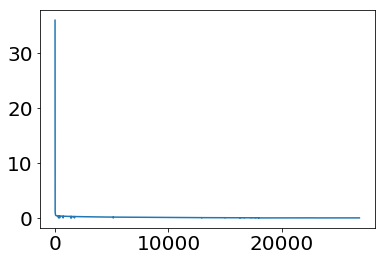

In [4]:
plt.plot(values)

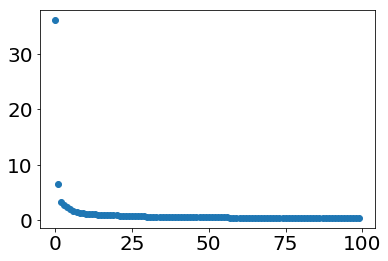

In [7]:
plt.plot(values[:100],'o')

In [8]:
running_sum = 0
new = []
for z in range(9,49-9):
    num_clusters = len(np.unique(cluster_model_labels[z]))
    new.append(vectors[running_sum:num_clusters+running_sum,:])
    running_sum += num_clusters

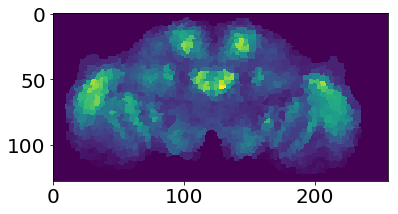

In [14]:
z=20
colored_by_betas = np.zeros((256*128))
for cluster_num in range(len(np.unique(cluster_model_labels[z]))):
    cluster_indicies = np.where(cluster_model_labels[z][:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = new[z-9][cluster_num,0]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T,cmap='viridis_r')

# Calculate temporal

In [15]:
load_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/super_brain.pickle'
with open(load_file, 'rb') as handle:
    temp_brain = pickle.load(handle)
#brain is a dict of z, each containing a variable number of supervoxels
#one dict element looks like: (n_clusters, 3384, 9)
X = np.zeros((0,3384,9))
for z in range(9,49-9):
    X = np.concatenate((X,temp_brain[z]),axis=0)

In [16]:
X = np.swapaxes(X,1,2) # THIS LINE WAS MISSING
X = np.reshape(X,(26840, -1))
X = X.T

In [17]:
X.shape # x is time by voxels

(30456, 26840)

In [18]:
# lets look at pc0 temporal
vectors[:,0].shape

(26840,)

In [83]:
t0 = time.time()
out = X.dot(vectors[:,:1000])
print(time.time()-t0)

4.670592308044434


In [84]:
out.shape

(30456, 1000)

In [85]:
file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/20210214_temporal'
np.save(file, out)

In [79]:
out.shape

(30456,)

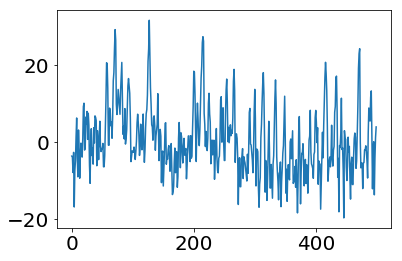

In [82]:
plt.plot(out[2000:2500,0]) # PERFECT!

In [ ]:
#31 slices, 6 by 6

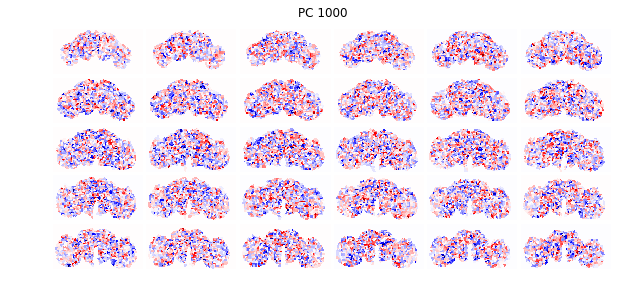

In [75]:
vmin = -.025
vmax = .025
pc = 999

fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111, nrows_ncols=(5, 6), axes_pad=.05)
for i, z in enumerate(range(9,49-10)):
    colored_by_betas = np.zeros((256*128))
    for cluster_num in range(len(np.unique(cluster_model_labels[z]))):
        cluster_indicies = np.where(cluster_model_labels[z][:]==cluster_num)[0]
        colored_by_betas[cluster_indicies] = new[z-9][cluster_num,pc]
    colored_by_betas = colored_by_betas.reshape(256,128)
    
    cax = grid[i].imshow(colored_by_betas.T,vmin=vmin,vmax=vmax,cmap='seismic_r');

for i in range(30):
    grid[i].axis('off')

plt.suptitle(F'PC {pc+1}',y=.7,fontsize=12)
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
plt.savefig(fname,dpi=300,bbox_inches='tight')

In [30]:
for z in range(9,49-9):
    print(z)

9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [ ]:
projection_matrix = (eigen_vectors.T[:][:2]).T
print(projection_matrix)

In [ ]:
X_pca = X.dot(projection_matrix)
print(X_pca)

In [ ]:
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/labels.pickle'
with open(labels_file, 'rb') as handle:
    cluster_model_labels = pickle.load(handle)

In [2]:
load_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/super_brain.pickle'
with open(load_file, 'rb') as handle:
    temp_brain = pickle.load(handle)

In [6]:
temp_brain[20].shape

(982, 3384, 9)

# fly_087

In [8]:
X = temp_brain[20][:,:,0].T

In [12]:
pca = PCA().fit(X)

In [13]:
pca.components_.shape #pc by voxel

(982, 982)

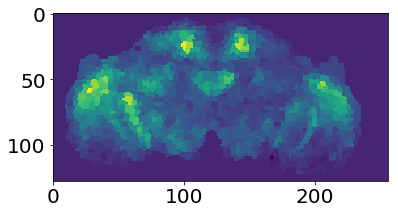

In [15]:
z=20
colored_by_betas = np.zeros((256*128))
for cluster_num in range(len(np.unique(cluster_model_labels[z]))):
    cluster_indicies = np.where(cluster_model_labels[z][:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = pca.components_[0,cluster_num]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T,cmap='viridis_r')

In [16]:
pca_loadings = pca.transform(X)

In [17]:
pca_loadings.shape #time by pc

(3384, 982)

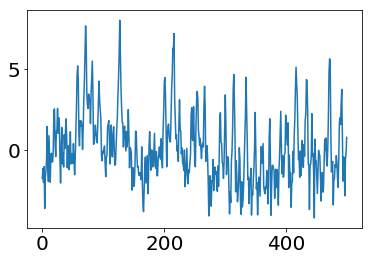

In [20]:
plt.plot(pca_loadings[2000:2500,0])

# fly_094

In [24]:
X = temp_brain[20][:,:,2].T
pca = PCA().fit(X)
pca_loadings = pca.transform(X)

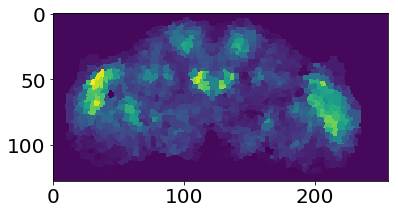

In [23]:
z=20
colored_by_betas = np.zeros((256*128))
for cluster_num in range(len(np.unique(cluster_model_labels[z]))):
    cluster_indicies = np.where(cluster_model_labels[z][:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = pca.components_[0,cluster_num]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T,cmap='viridis')

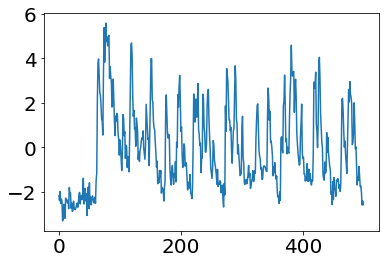

In [25]:
plt.plot(pca_loadings[2000:2500,0])

# Both

In [30]:
X = temp_brain[20][:,:,(0,1)].T
X = np.reshape(X,(-1,982))
pca = PCA().fit(X)
pca_loadings = pca.transform(X)

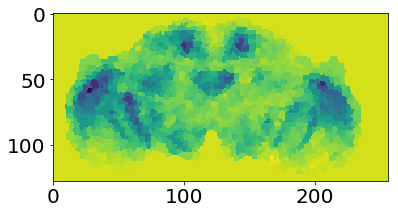

In [31]:
z=20
colored_by_betas = np.zeros((256*128))
for cluster_num in range(len(np.unique(cluster_model_labels[z]))):
    cluster_indicies = np.where(cluster_model_labels[z][:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = pca.components_[0,cluster_num]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T,cmap='viridis')

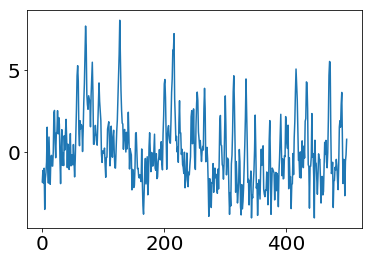

In [32]:
plt.plot(pca_loadings[2000:2500,0])

### hmm this actually looks 100% fine - no spike artifacts

In [153]:
X = temp_brain[20][:,:,:].T
X = np.reshape(X,(-1,982))
X.shape #time by voxels

(30456, 982)

In [36]:
pca = PCA().fit(X)
pca_loadings = pca.transform(X)

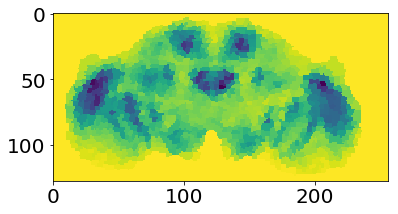

In [157]:
z=20
colored_by_betas = np.zeros((256*128))
for cluster_num in range(len(np.unique(cluster_model_labels[z]))):
    cluster_indicies = np.where(cluster_model_labels[z][:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = pca.components_[0,cluster_num]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T,cmap='viridis')

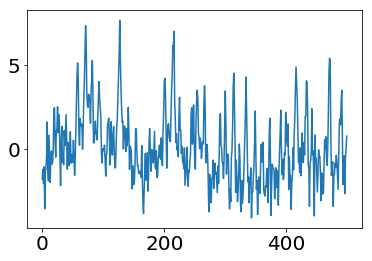

In [158]:
plt.plot(pca_loadings[2000:2500,0])

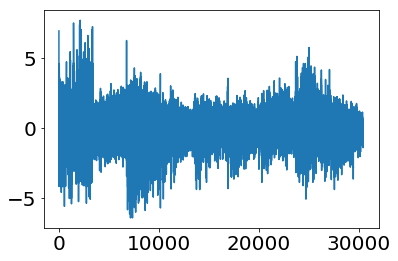

In [42]:
plt.plot(pca_loadings[:,0])

### All flies one slice still looks perfect

In [155]:
z=20
X = temp_brain[z][:,:,:].T
X = np.reshape(X,(-1,len(np.unique(cluster_model_labels[z]))))
X.shape

(30456, 982)

In [156]:
pca = PCA().fit(X)
pca_loadings = pca.transform(X)

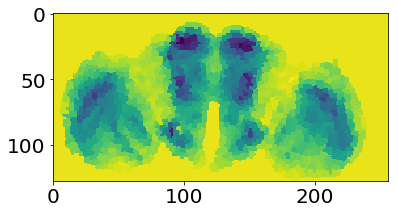

In [53]:
colored_by_betas = np.zeros((256*128))
for cluster_num in range(len(np.unique(cluster_model_labels[z]))):
    cluster_indicies = np.where(cluster_model_labels[z][:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = pca.components_[0,cluster_num]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T,cmap='viridis')

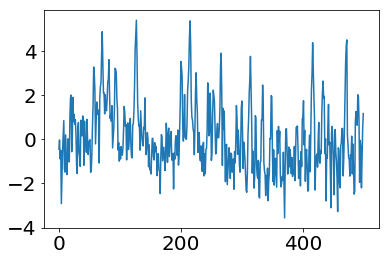

In [48]:
plt.plot(pca_loadings[2000:2500,0])

# full brain 1 fly

In [61]:
X = np.zeros((0,3384))
for z in range(49):
    X = np.concatenate((X,temp_brain[z][:,:,0]),axis=0)
X = X.T

In [62]:
X.shape

(3384, 30886)

In [63]:
pca = PCA().fit(X)
pca_loadings = pca.transform(X)

In [64]:
pca.components_.shape

(3384, 30886)

In [65]:
### I need to reshape the pca back into slice form, which is a litle trickier since
# there are variable numbers of clusters per slice
running_sum = 0
new = []
for z in range(49):
    num_clusters = len(np.unique(cluster_model_labels[z]))
    #print(f"Z: {z}   num_clusters: {num_clusters}    running_sum: {running_sum}")
    new.append(pca.components_[:,running_sum:num_clusters+running_sum])
    running_sum += num_clusters

In [68]:
new[20].shape

(3384, 982)

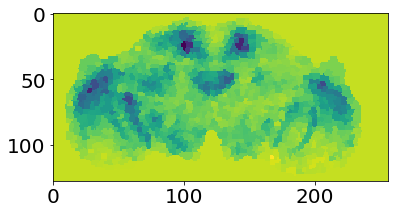

In [78]:
z=20
colored_by_betas = np.zeros((256*128))
for cluster_num in range(len(np.unique(cluster_model_labels[z]))):
    cluster_indicies = np.where(cluster_model_labels[z][:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = new[z][0,cluster_num]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T,cmap='viridis')

In [71]:
pca_loadings.shape

(3384, 3384)

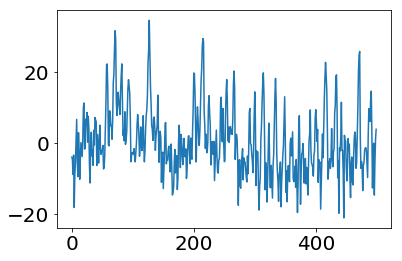

In [76]:
plt.plot(pca_loadings[2000:2500,0])

### Also looks good!

In [ ]:
# lets see if each fly looks good independently
# 0 is good
# 1 is good
# 2 is good
# 3 is good
# 4 is good
# 5 is good
# 6 is good
# 7 is good
# 8 is good, but probably the weirdest


In [93]:
print('\a')




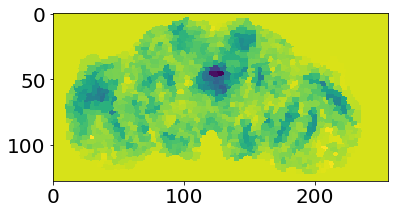

In [106]:
fly_idx = 8

X = np.zeros((0,3384))
for z in range(49):
    X = np.concatenate((X,temp_brain[z][:,:,fly_idx]),axis=0)
X = X.T
pca = PCA().fit(X)
pca_loadings = pca.transform(X)

running_sum = 0
new = []
for z in range(49):
    num_clusters = len(np.unique(cluster_model_labels[z]))
    new.append(pca.components_[:,running_sum:num_clusters+running_sum])
    running_sum += num_clusters
    
z=20
colored_by_betas = np.zeros((256*128))
for cluster_num in range(len(np.unique(cluster_model_labels[z]))):
    cluster_indicies = np.where(cluster_model_labels[z][:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = new[z][0,cluster_num]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T,cmap='viridis')

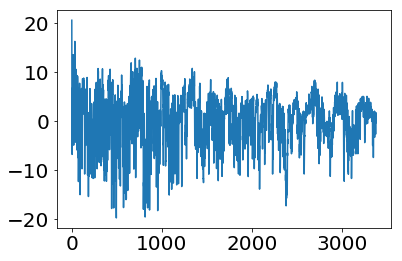

In [108]:
plt.plot(pca_loadings[:,0])

### Next let's try 2 full flies

In [123]:
temp_brain[20].shape

(982, 3384, 9)

In [124]:
X = np.zeros((0,3384,2))
for z in range(49):
    X = np.concatenate((X,temp_brain[z][:,:,(0,1)]),axis=0) #was (1,2)
X.shape

(30858, 3384, 2)

In [125]:
X = np.reshape(X,(30858, -1))
X = X.T
X.shape #time by voxels

(6768, 30858)

In [126]:
t0 = time.time()
pca = PCA().fit(X)
pca_loadings = pca.transform(X)
print(time.time()-t0)

293.00148034095764


In [113]:
pca.components_.shape #pc by voxel

(6768, 30858)

In [127]:
running_sum = 0
new = []
for z in range(49):
    num_clusters = len(np.unique(cluster_model_labels[z]))
    new.append(pca.components_[:,running_sum:num_clusters+running_sum])
    running_sum += num_clusters

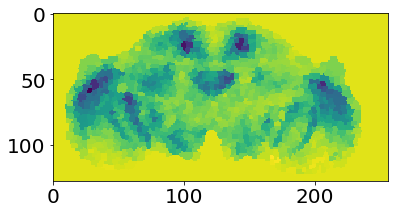

In [128]:
z=20
colored_by_betas = np.zeros((256*128))
for cluster_num in range(len(np.unique(cluster_model_labels[z]))):
    cluster_indicies = np.where(cluster_model_labels[z][:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = new[z][0,cluster_num]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T,cmap='viridis')

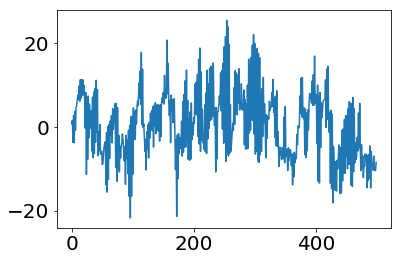

In [129]:
plt.plot(pca_loadings[2000:2500,0])

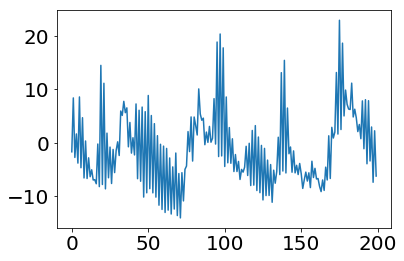

In [118]:
plt.plot(pca_loadings[2000:2200,0])

# The weirdness has emerged!

In [ ]:
# What about 3 slices, 2 flies? - artifact
# What about 2 neighboring slices, 2 flies? - artifact
# suspecting a reshaping issue

#for all fly one slice, X shape is (30456, 982) time by voxels

In [167]:
X = np.zeros((0,3384,2))
for z in [10,20,30]:
    X = np.concatenate((X,temp_brain[z][:,:,(0,1)]),axis=0) #was (1,2)
X.shape

(2533, 3384, 2)

In [168]:
X = np.swapaxes(X,1,2) #SOLVED - THIS LINE WAS MISSING AND SHAPE WAS WEIRD
X.shape

(2533, 2, 3384)

In [170]:
X = np.reshape(X,(2533, -1))
X = X.T
X.shape #time by voxels

(6768, 2533)

In [171]:
t0 = time.time()
pca = PCA().fit(X)
pca_loadings = pca.transform(X)
print(time.time()-t0)

11.47024941444397


In [172]:
running_sum = 0
new = []
for z in [10,20,30]:
    num_clusters = len(np.unique(cluster_model_labels[z]))
    new.append(pca.components_[:,running_sum:num_clusters+running_sum])
    running_sum += num_clusters

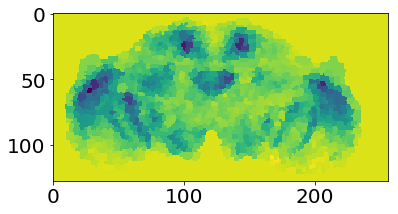

In [173]:
z=20
colored_by_betas = np.zeros((256*128))
for cluster_num in range(len(np.unique(cluster_model_labels[z]))):
    cluster_indicies = np.where(cluster_model_labels[z][:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = new[1][0,cluster_num]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T,cmap='viridis')

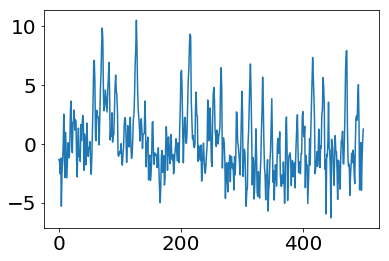

In [174]:
plt.plot(pca_loadings[2000:2500,0])

In [138]:
pca_loadings.shape

(6768, 2533)

In [2]:
in_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/diego.nii"
brain = np.asarray(nib.load(in_file).get_data(), dtype='float32')

In [3]:
brain.shape

(908, 774, 340, 1)

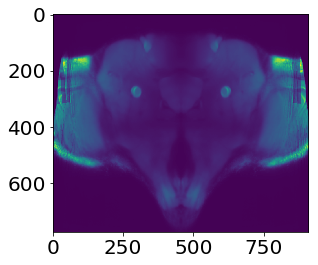

In [5]:
plt.imshow(brain[:,:,200,0].T)

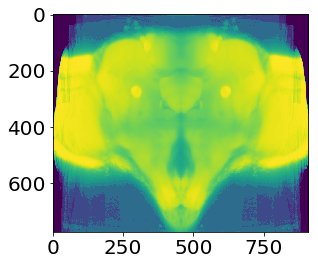

In [10]:
plt.imshow(brain_out[:,:,200,0].T)

In [7]:
from sklearn.preprocessing import quantile_transform

In [8]:
### Perform quantile normalization ###
brain_out = quantile_transform(brain.flatten().reshape(-1, 1), n_quantiles=500, random_state=0, copy=True)
brain_out = brain_out.reshape(brain.shape)
np.nan_to_num(brain_out, copy=False)

# ### Save brain ###
# fname = in_file.split('/')[-1].split('.')[0]
# save_file = os.path.join(save_dir, f'{fname}_clean.nii')
# aff = np.eye(4)
# img = nib.Nifti1Image(brain_out, aff)
# img.to_filename(save_file)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [11]:
### Save brain ###

save_file = os.path.join('/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates', 'diego_quant')
aff = np.eye(4)
img = nib.Nifti1Image(brain_out, aff)
img.to_filename(save_file)

In [22]:
file = F'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/20210130_eigen_values_new_clusters.npy'
values = np.load(file).real
print(values.shape)

file = F'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/20210130_eigen_vectors_new_clusters.npy'
vectors = np.load(file).real
print(vectors.shape)# vectors is voxel by PC

(30858,)
(30858, 30858)


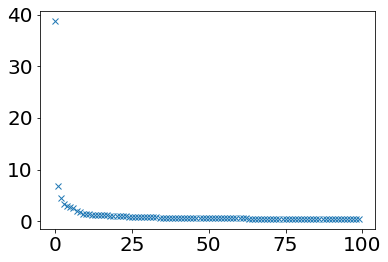

In [23]:
plt.plot(values[:100],'x')

In [24]:
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/labels.pickle'
with open(labels_file, 'rb') as handle:
    cluster_model_labels = pickle.load(handle)

In [48]:
### I need to reshape the pca back into slice form, which is a litle trickier since
# there are variable numbers of clusters per slice
running_sum = 0
new = []
for z in range(49):
    num_clusters = len(np.unique(cluster_model_labels[z]))
    #print(f"Z: {z}   num_clusters: {num_clusters}    running_sum: {running_sum}")
    new.append(vectors[running_sum:num_clusters+running_sum,:])
    running_sum += num_clusters

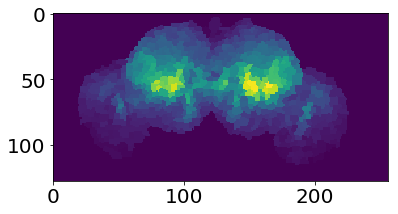

In [52]:
z=10
colored_by_betas = np.zeros((256*128))
for cluster_num in range(len(np.unique(cluster_model_labels[z]))):
    cluster_indicies = np.where(cluster_model_labels[z][:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = new[z][cluster_num,0]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T,cmap='viridis_r')

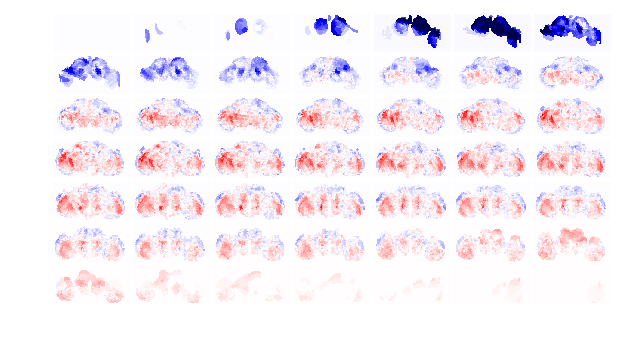

In [109]:
vmin = -.025
vmax = .025
pc = 2

fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111, nrows_ncols=(7, 7), axes_pad=.05)
for z in range(49):
    colored_by_betas = np.zeros((256*128))
    for cluster_num in range(len(np.unique(cluster_model_labels[z]))):
        cluster_indicies = np.where(cluster_model_labels[z][:]==cluster_num)[0]
        colored_by_betas[cluster_indicies] = new[z][cluster_num,pc]
    colored_by_betas = colored_by_betas.reshape(256,128)
    
    cax = grid[z].imshow(colored_by_betas.T,vmin=vmin,vmax=vmax,cmap='seismic_r');

for z in range(49):
    grid[z].axis('off')
    
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')

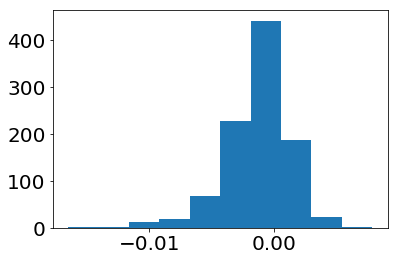

In [108]:
pc=2
plt.hist(new[20][:,pc]);

In [110]:
load_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/super_brain.pickle'
with open(load_file, 'rb') as handle:
    temp_brain = pickle.load(handle)
#brain is a dict of z, each containing a variable number of supervoxels
#one dict element looks like: (n_clusters, 3384, 9)
brain = np.zeros((0,3384,9))
for z in range(49):
    brain = np.concatenate((brain,temp_brain[z]),axis=0)

In [111]:
brain.shape

(30858, 3384, 9)

In [113]:
X = np.reshape(brain, (-1,3384*9))
X = X.T
print('X is time by voxels {}'.format(X.shape))

X is time by voxels (30456, 30858)


In [115]:
### How to get the time series of a PC from this np.linalg.eig function?
###PCA.TRANSFORM: X_transformed = np.dot(X, self.components_.T)

# pca.components_ is PC by voxel
# vectors is voxel by PC

out = np.dot(X, vectors)
# this should be time by pc
# I think this "worked" but they do look a little weird - lets get more info below

In [116]:
out.shape

(30456, 30858)

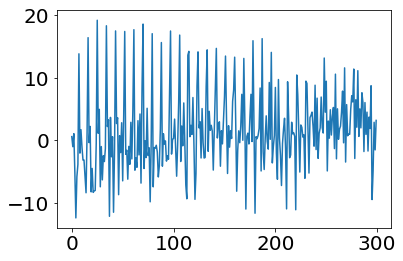

In [144]:
plt.plot(out[200:500,0])

In [160]:
file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210115_super_brain/20210119_pca_scores_two_slice_far.npy'
scores = np.load(file)
print(scores.shape)

file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210115_super_brain/20210119_pca_loadings_two_slice_far.npy'
loadings = np.load(file)
print(loadings.shape)

(4000, 4000)
(30456, 4000)


In [155]:
one_fly_loadings = loadings

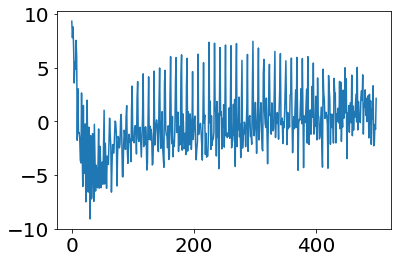

In [161]:
plt.plot(loadings[:500,0])

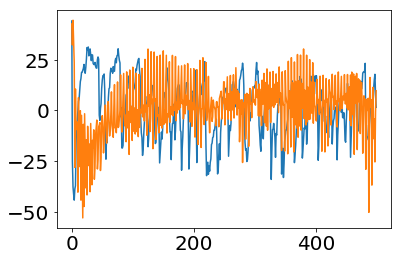

In [157]:
#Loadings is time by PC
plt.plot(one_fly_loadings[:500,0])
plt.plot(loadings[:500,0])

In [ ]:
###five_fly also has spikes
# one fly looks perfect - no spikes
# two fly has spikes

In [163]:
2000*49*3384*9*8*10**-9

23.877504000000002

In [2]:
load_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/super_brain.pickle'
with open(load_file, 'rb') as handle:
    temp_brain = pickle.load(handle)
#brain is a dict of z, each containing a variable number of supervoxels
#one dict element looks like: (n_clusters, 3384, 9)
brain = np.zeros((0,3384,9))
for z in range(49):
    brain = np.concatenate((brain,temp_brain[z]),axis=0)

In [41]:
brain.shape

(30858, 3384, 9)

In [7]:
brain.nbytes*10**-9

7.518489984

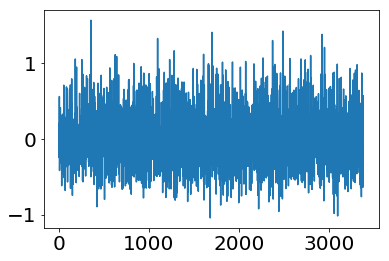

In [45]:
plt.plot(brain[-20000,:,0])

In [21]:
brain[0,-1000:,0]

array([-5.33973036e-06,  9.68124630e-06, -4.61792359e-06, -1.29293710e-06,
       -4.11365178e-06, -3.79242086e-06,  1.20512773e-05,  1.96697940e-05,
       -5.18245020e-06, -3.90175223e-06, -2.36727904e-06,  2.57125402e-05,
       -1.43639993e-06,  3.38167018e-06, -3.84156469e-07,  1.25037715e-05,
       -3.91264614e-06,  1.28902053e-06,  2.14016731e-06, -4.46219747e-06,
        1.55194784e-06, -4.66744199e-06,  2.08056906e-06, -3.41033100e-06,
       -3.81581229e-07,  1.52719741e-06, -2.93819343e-06,  5.35615903e-06,
        6.78112563e-08, -3.85991824e-06, -4.17412889e-06, -2.71061984e-06,
        5.58753252e-06, -5.46716851e-06, -1.45944337e-06, -3.65903636e-06,
       -5.02411263e-06,  1.37876263e-05, -3.46028229e-06, -2.68339702e-06,
        1.75698913e-05, -4.40135237e-07, -4.27343661e-06, -4.13839751e-06,
       -5.88758460e-06, -1.70728746e-06, -3.91246601e-06, -5.51508761e-06,
        4.19622982e-06, -5.37646024e-06, -3.99554241e-06, -2.84161928e-06,
        4.24787134e-06,  

In [2]:
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/labels.pickle'
with open(labels_file, 'rb') as handle:
    cluster_model_labels = pickle.load(handle)

In [10]:
a=np.zeros(((31,3384,9)))
b=np.zeros(((40,3384,9)))
c=np.zeros((0,3384,9))

In [11]:
c.shape

(0, 3384, 9)

In [12]:
np.concatenate((c,a),axis=0).shape

(31, 3384, 9)

In [3]:
np.unique(cluster_model_labels[2])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

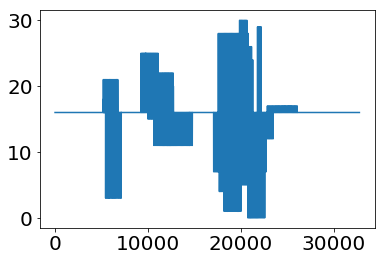

In [11]:
plt.plot(cluster_model_labels[2])

In [58]:
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"
fly = 'fly_087'

brain_file = os.path.join(dataset_path, fly, 'func_0', 'brain_zscored_green_high_pass_masked_warped.nii')
brain = np.array(nib.load(brain_file).get_data(), copy=True)

In [59]:
brain.shape

(256, 128, 49, 3384)

In [55]:
z=20
brain_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/superslice_{}.nii".format(z) #<---------- !!!
brain = np.array(nib.load(brain_file).get_data(), copy=True)
fly_idx_delete = 3 #(fly_095)
brain = np.delete(brain, fly_idx_delete, axis=-1) #### DELETING FLY_095 ####

In [66]:
#load clusters
n_clusters = 2000
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/final_9_cluster_labels_2000.npy'
#labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/cluster_labels.npy'
cluster_model_labels = np.load(labels_file) #z,t

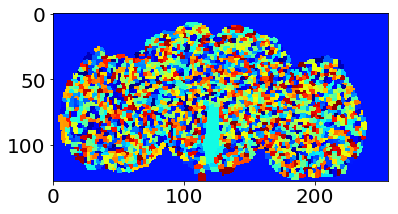

In [67]:
colored_by_betas = np.zeros((256*128))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = np.random.randint(0,1000,1)
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T,cmap='jet')

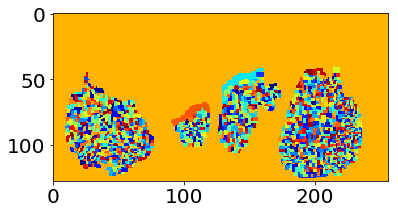

In [54]:
colored_by_betas = np.zeros((256*128))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = np.random.randint(0,1000,1)
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T,cmap='jet')

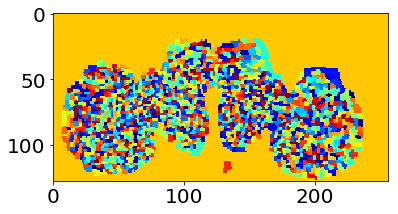

In [48]:
colored_by_betas = np.zeros((256*128))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = np.random.randint(0,1000,1)
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T,cmap='jet')

(2000,)
(2000, 2000)


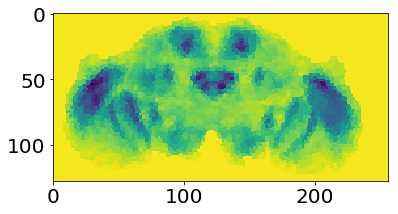

In [7]:
### This works

file = F'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210115_super_brain/20210127_eigen_values_single_slice.npy'
values = np.load(file)
print(values.shape)

file = F'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210115_super_brain/20210127_eigen_vectors_single_slice.npy'
vectors = np.load(file)
print(vectors.shape)# vectors is voxel by PC

#load clusters
n_clusters = 2000
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/final_9_cluster_labels_2000.npy'
#labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/cluster_labels.npy'
cluster_model_labels = np.load(labels_file) #z,t

z=20

colored_by_betas = np.zeros((256*128))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = vectors[cluster_num,0]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T)

(40000,)
(40000, 40000)


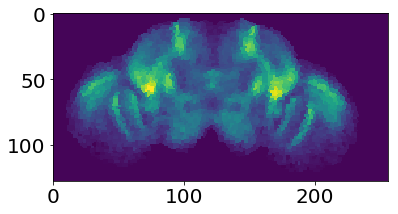

In [2]:
file = F'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210115_super_brain/20210127_eigen_values_all_fly_trimmed_zs_more.npy'
values = np.load(file)
print(values.shape)

file = F'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210115_super_brain/20210127_eigen_vectors_all_fly_trimmed_zs_more.npy'
vectors = np.load(file)
print(vectors.shape)

vectors = np.reshape(vectors, (2000,20,40000))

#load clusters
n_clusters = 2000
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/final_9_cluster_labels_2000.npy'
#labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/cluster_labels.npy'
cluster_model_labels = np.load(labels_file) #z,t

z=15
colored_by_betas = np.zeros((256*128))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = vectors[cluster_num,0,0]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T)

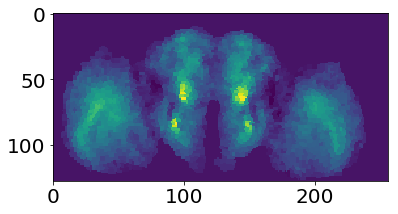

In [44]:
z=34
colored_by_betas = np.zeros((256*128))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = vectors[cluster_num,z-15,0]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T)

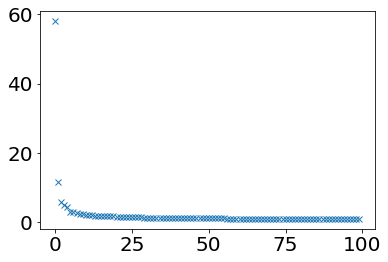

In [6]:
plt.plot(values[:100],'x')

In [28]:
values[70]

1.331059393724191e-05

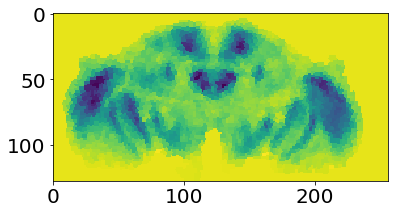

In [5]:
z=21
colored_by_betas = np.zeros((256*128))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = vectors[cluster_num,1,0]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T)

In [29]:
file = F'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210115_super_brain/20210125_eigen_values_all_fly_trimmed_zs.npy'
values = np.load(file)
print(values.shape)

file = F'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210115_super_brain/20210125_eigen_vectors_all_fly_trimmed_zs.npy'
vectors = np.load(file)
print(vectors.shape)

(70000,)
(70000, 70000)


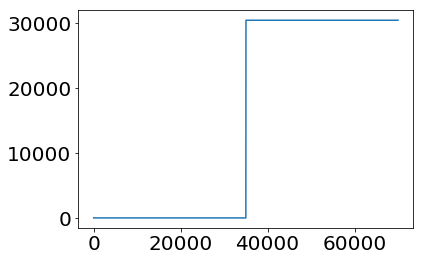

In [31]:
plt.plot(values)

In [ ]:
vectors = np.reshape(vectors, (2000,35,70000))

#load clusters
n_clusters = 2000
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/final_9_cluster_labels_2000.npy'
#labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/cluster_labels.npy'
cluster_model_labels = np.load(labels_file) #z,t

z=20
colored_by_betas = np.zeros((256*128))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = vectors[cluster_num,0,71]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T)

In [6]:
np.max(vectors.real)

0.999990055715514

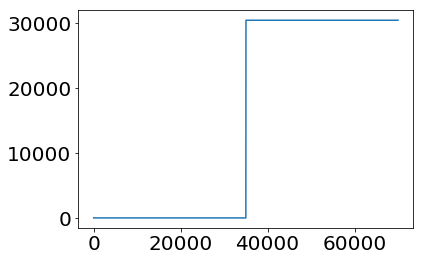

In [6]:
plt.plot(values)

In [16]:
values.real

array([-8.98840741e-10,  8.40241853e-09, -1.59850750e-09, ...,
        3.04560000e+04,  3.04560000e+04,  3.04560000e+04])

In [11]:
vectors[0,:]

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

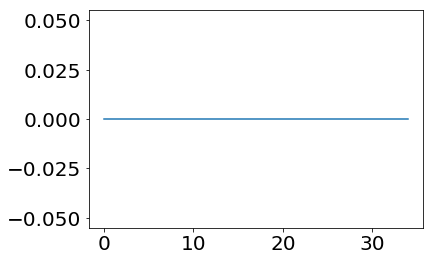

In [10]:
plt.plot(vectors[0,0])

In [3]:
vectors = np.reshape(vectors, (2000,35,70000))
vectors.shape

(2000, 35, 70000)

In [4]:
#load clusters
n_clusters = 2000
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/final_9_cluster_labels_2000.npy'
#labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/cluster_labels.npy'
cluster_model_labels = np.load(labels_file) #z,t

In [10]:
# vectors is voxel by PC
vectors.shape

(2000, 2000)

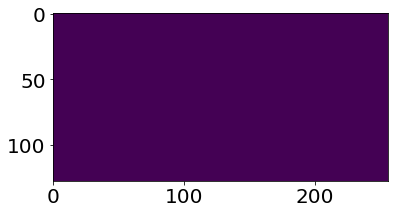

In [5]:
z=20

colored_by_betas = np.zeros((256*128))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = vectors[cluster_num,z-7,0]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T)

# Single Slice

In [3]:
file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210115_super_brain/20210118_pca_scores_single_slice.npy'
scores = np.load(file)

In [4]:
scores.shape

(2000, 2000)

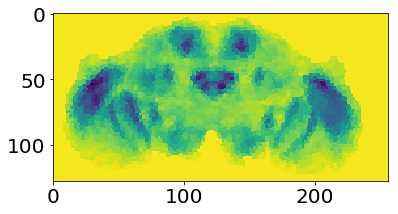

In [5]:
z=20

colored_by_betas = np.zeros((256*128))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = scores[0,cluster_num]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T)

In [11]:
file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210115_super_brain/20210119_pca_scores_two_slice_far.npy'
scores = np.load(file)

In [12]:
scores.shape

(4000, 4000)

In [13]:
scores = np.reshape(scores, (4000,2000,2))

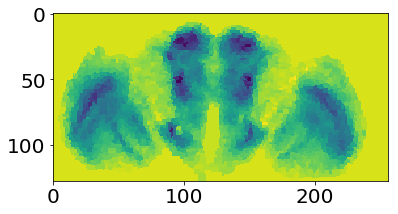

In [19]:
z=30

colored_by_betas = np.zeros((256*128))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = scores[0,cluster_num,1]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T)

# One-fly

In [20]:
file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210115_super_brain/20210119_pca_scores_one_fly.npy'
scores = np.load(file)
scores.shape

(3384, 98000)

In [21]:
scores = np.reshape(scores, (3384,2000,49))

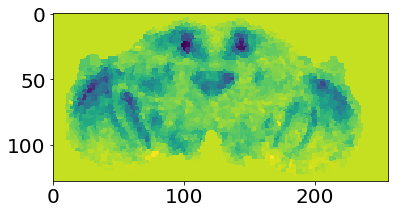

In [35]:
z=20

colored_by_betas = np.zeros((256*128))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = scores[0,cluster_num,z]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T)

# Five-fly

In [3]:
file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210115_super_brain/20210119_pca_scores_five_fly.npy'
scores = np.load(file)
scores.shape

(16920, 98000)

In [4]:
scores = np.reshape(scores, (16920,2000,49))

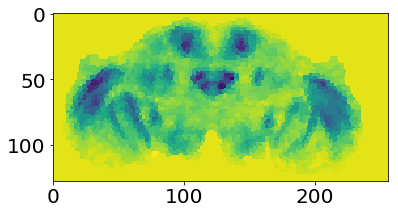

In [14]:
z=20

colored_by_betas = np.zeros((256*128))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = scores[0,cluster_num,z]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T)

(array([  6.,  25.,  27.,  83., 118., 160., 292., 585., 556., 148.]),
 array([-0.01300318, -0.01165761, -0.01031204, -0.00896647, -0.00762091,
        -0.00627534, -0.00492977, -0.0035842 , -0.00223864, -0.00089307,
         0.0004525 ]),
 <a list of 10 Patch objects>)

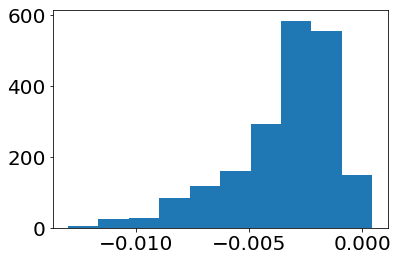

In [15]:
plt.hist(scores[0,:,z])

# Trimmed Zs

In [ ]:
file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210115_super_brain/20210119_pca_scores_trimmed_zs.npy'
scores = np.load(file)
scores.shape

# All Slice

In [17]:
file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210115_super_brain/20210119_pca_scores_all_slice.npy'
scores = np.load(file)
scores.shape

(30456, 98000)

In [5]:
scores = np.reshape(scores,(30456,2000,49))

(array([  5.,  61., 228., 505., 636., 415., 126.,  19.,   4.,   1.]),
 array([-2.20145410e+18, -1.68641743e+18, -1.17138076e+18, -6.56344086e+17,
        -1.41307416e+17,  3.73729254e+17,  8.88765925e+17,  1.40380260e+18,
         1.91883927e+18,  2.43387594e+18,  2.94891261e+18]),
 <a list of 10 Patch objects>)

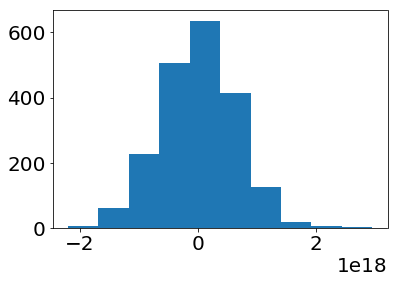

In [7]:
plt.hist(scores[0,:,z])

In [11]:
np.arange(0,1000,100)[0:2]

array([  0, 100])

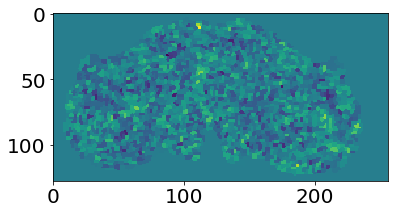

In [6]:
z=20

colored_by_betas = np.zeros((256*128))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = scores[0,cluster_num,z]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T)

In [23]:
scores.shape

(30456, 49, 2000)

In [25]:
scores[:,[20,30],:].shape

(30456, 2, 2000)

In [2]:
file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210103_super_brain/20210114_pca_scores.npy'
scores = np.load(file)

file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210103_super_brain/20210114_pca_loadings.npy'
loadings = np.load(file)

In [3]:
scores.shape, loadings.shape

((30456, 98000), (30456, 30456))

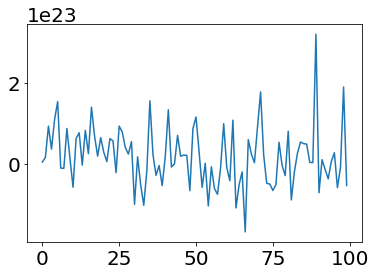

In [19]:
plt.plot(loadings[:100,30004])
#plt.plot(loadings[:100,0])

In [17]:
scores = np.reshape(scores,(30456,2000,49))

In [10]:
scores.shape

(30456, 49, 2000)

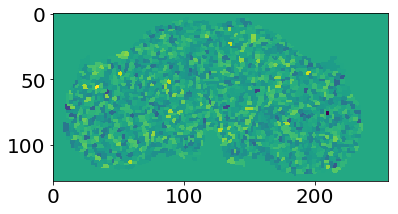

In [21]:
z=20

colored_by_betas = np.zeros((256*128))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
    colored_by_betas[cluster_indicies] = scores[0,cluster_num,z]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T)

In [2]:
load_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210103_super_brain/20210103_super_brain.npy'
brain = np.load(load_file)

In [3]:
brain.shape

(98000, 30456)

In [4]:
49*2000

98000

In [9]:
20*2000

40000

In [3]:
class Fly:
    def __init__ (self, fly_name, fly_idx):
        self.dir = os.path.join(dataset_path, fly_name, 'func_0')
        self.fly_idx = fly_idx
        self.fly_name = fly_name
        self.maps = {}
    def load_timestamps (self):
        self.timestamps = bbb.load_timestamps(os.path.join(self.dir, 'imaging'))
    def load_fictrac (self):
        self.fictrac = Fictrac(self.dir, self.timestamps)
    def load_brain_slice (self):
        self.brain = brain[:,:,:,self.fly_idx]
    def load_anatomy (self):
        to_load = os.path.join(dataset_path, self.fly_name, 'warp', 'anat-to-meanbrain.nii')
        self.anatomy = np.array(nib.load(to_load).get_data(), copy=True)
    def get_cluster_averages (self, cluster_model_labels, n_clusters):
        neural_data = self.brain.reshape(-1, 3384)
        signals = []
        self.cluster_indicies = []
        for cluster_num in range(n_clusters):
            cluster_indicies = np.where(cluster_model_labels==cluster_num)[0]
            mean_signal = np.mean(neural_data[cluster_indicies,:], axis=0)
            signals.append(mean_signal)
            self.cluster_indicies.append(cluster_indicies) # store for later
        self.cluster_signals=np.asarray(signals)
        #self.cluster_signals=brain[40000:42000,:3384]
    def get_cluster_id (self, x, y):
        ax_vec = x*128 + y
        for i in range(n_clusters):
            if ax_vec in self.cluster_indicies[i]:
                cluster_id = i
                break
        return cluster_id

class Fictrac:
    def __init__ (self, fly_dir, timestamps):
        self.fictrac_raw = bbb.load_fictrac(os.path.join(fly_dir, 'fictrac'))
        self.timestamps = timestamps
    def make_interp_object(self, behavior):
        # Create camera timepoints
        fps=50
        camera_rate = 1/fps * 1000 # camera frame rate in ms
        expt_len = 1000*30*60
        x_original = np.arange(0,expt_len,camera_rate)

        # Smooth raw fictrac data
        fictrac_smoothed = scipy.signal.savgol_filter(np.asarray(self.fictrac_raw[behavior]),25,3)

        # Create interp object with camera timepoints
        fictrac_interp_object = interp1d(x_original, fictrac_smoothed, bounds_error = False)
        return fictrac_interp_object

    def pull_from_interp_object(self, interp_object, timepoints):
        new_interp = interp_object(timepoints)
        np.nan_to_num(new_interp, copy=False);
        return new_interp

    def interp_fictrac(self, z):
        behaviors = ['dRotLabY', 'dRotLabZ']; shorts = ['Y', 'Z']
        self.fictrac = {}

        for behavior, short in zip(behaviors, shorts):
            interp_object = self.make_interp_object(behavior)
            self.fictrac[short + 'i'] = interp_object

            ### Velocity ###
            low_res_behavior = self.pull_from_interp_object(interp_object, self.timestamps[:,z])
            self.fictrac[short] = low_res_behavior#/np.std(low_res_behavior)

            ### Clipped Velocities ###
            self.fictrac[short + '_pos'] = np.clip(self.fictrac[short], a_min=0, a_max=None)
            self.fictrac[short + '_neg'] = np.clip(self.fictrac[short], a_min=None, a_max=0)*-1

            ### Strongly Clipped Velocities ###
            # excludes points even close to 0
            #self.fictrac[short + '_pos_very'] = np.clip(self.fictrac[short], a_min=0.3, a_max=None)
            #self.fictrac[short + '_neg_very'] = np.clip(self.fictrac[short], a_min=None, a_max=-0.3)*-1

            ### Acceleration ###
            high_res_behavior = self.pull_from_interp_object(interp_object, high_res_timepoints)
            self.fictrac[short + 'h'] = high_res_behavior/np.std(high_res_behavior)

            accel = scipy.signal.savgol_filter(np.diff(high_res_behavior),25,3)
            accel = np.append(accel, 0)
            interp_object = interp1d(high_res_timepoints, accel, bounds_error = False)
            acl = interp_object(self.timestamps[:,z])
            acl[-1] = 0
            self.fictrac[short + 'a'] = acl#/np.std(acl)

            ### Clipped Acceleration ###
            self.fictrac[short + 'a' + '_pos'] = np.clip(self.fictrac[short + 'a'], a_min=0, a_max=None)
            self.fictrac[short + 'a' + '_neg'] = np.clip(self.fictrac[short + 'a'], a_min=None, a_max=0)*-1

        self.fictrac['YZ'] = np.sqrt(np.power(self.fictrac['Y'],2), np.power(self.fictrac['Z'],2))
        self.fictrac['YZh'] = np.sqrt(np.power(self.fictrac['Yh'],2), np.power(self.fictrac['Zh'],2))

In [4]:
z = 20

In [5]:
fly_names = ['fly_087', 'fly_089', 'fly_094', 'fly_097', 'fly_098', 'fly_099', 'fly_100', 'fly_101', 'fly_105']
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"
expt_len = 1000*30*60
resolution = 10
high_res_timepoints = np.arange(0,expt_len,resolution) #0 to last time at subsample res

In [6]:
#######################
### Load Superslice ###
#######################
brain_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/superslice_{}.nii".format(z) #<---------- !!!
brain = np.array(nib.load(brain_file).get_data(), copy=True)
fly_idx_delete = 3 #(fly_095)
brain = np.delete(brain, fly_idx_delete, axis=-1) #### DELETING FLY_095 ####

In [7]:
#####################
### Load Clusters ###
#####################
n_clusters = 2000
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/final_9_cluster_labels_2000.npy'
cluster_model_labels = np.load(labels_file)
cluster_model_labels = cluster_model_labels[z,:]

In [8]:
###################
### Build Flies ###
###################
flies = {}
fly_names=['fly_087']
for i, fly in enumerate(fly_names):
    flies[fly] = Fly(fly_name=fly, fly_idx=i)
    flies[fly].load_timestamps()
    flies[fly].load_fictrac()
    flies[fly].fictrac.interp_fictrac(z)
    flies[fly].load_brain_slice()
    flies[fly].get_cluster_averages(cluster_model_labels, n_clusters)


~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 4.51 ms

~~ load_fictrac ~~
load_fictrac done. Duration: 2.86 sec


In [9]:
################
### Correlate ###
#################
behavior_to_corr = 'Y_pos'
for fly in fly_names:
    r_values = []
    p_values = []
    for cluster in range(n_clusters):
        Y = flies[fly].cluster_signals[cluster]
        X = flies[fly].fictrac.fictrac[behavior_to_corr]

        r, p = scipy.stats.pearsonr(X, Y)
        r_values.append(r)
        p_values.append(p)

In [17]:
flies[fly].cluster_signals[0].shape

(3384,)

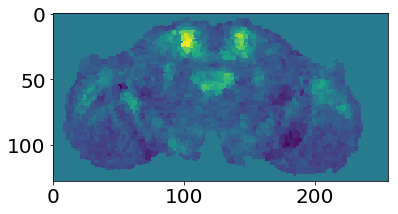

In [10]:
z=20

colored_by_betas = np.zeros((256*128))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels==cluster_num)[0]
    colored_by_betas[cluster_indicies] = r_values[cluster_num]
colored_by_betas = colored_by_betas.reshape(256,128)

plt.imshow(colored_by_betas.T)

In [11]:
flies[fly].brain.shape

(256, 128, 3384)